# Template matching using OpenCV in Python


**Template matching** is a technique for matcheing between an image patch (template) and an input image, giving a threshold. If we are searching for almost identical templates, then we should increase the thersholf(i.e t>=0.8), 

- **We need two primary components:**
    - Source image (I): The image in which we expect to find a match to the template image
    - Template image (T): The patch image which will be compared to the source image

## How Template Matching Works?
### Step-By-Step:

- 1) The template image simply slides ***pixel by pixel*** over the input image (as in 2D convolution)
- 2) The template and patch of input image under the template image are compared using similarity metric.
- 3) The result obtained is compared with the threshold, using the function `cv2.matchTemplate()`
- 4) If the result is greater than threshold, the portion will be marked as detected.


> If the similarity metric is high enough for one pixel, then this pixel is probably the top-left corner of an object matching your template!

### Functions used

- 1) **cv2.matchTemplate**

**Syntax:** `result = cv.matchTemplate(image, templ, method[, result[, mask]])`

**Parameters:**

- ***image*** -> Image where the search is running. It must be 8-bit or 32-bit floating-point.
- ***templ*** -> Searched template. It must be not greater than the source image and have the same data type.
- ***method*** -> Parameter specifying the comparison method, see TemplateMatchModes
- ***mask*** -> Mask of searched template. It must have the same datatype and size with templ. It is not set by default. Currently, only the TM_SQDIFF and TM_CCORR_NORMED methods are supported.



**Returns:**

- ***result*** -> Map of comparison results. It must be single-channel 32-bit floating-point. If image is W×H and templ is w×h , then result is (W−w+1)×(H−h+1) .

---

- 2) **cv2.minMaxLoc**

**Syntax:** `minVal, maxVal, minLoc, maxLoc	= cv.minMaxLoc( src[, mask] )`



**Parameters:**

- ***src*** -> input single-channel array.
- ***mask*** -> optional mask used to select a sub-array.



**Returns:**

- ***minVal*** -> pointer to the returned minimum value; NULL is used if not required.
- ***maxVal*** -> pointer to the returned maximum value; NULL is used if not required.
- ***minLoc*** -> pointer to the returned minimum location (in 2D case); NULL is used if not required.
- ***maxLoc*** -> pointer to the returned maximum location (in 2D case); NULL is used if not required.sequentially.



> We localize the minimum and maximum values in the result matrix R by using minMaxLoc().
> For the first two methods ( TM_SQDIFF and MT_SQDIFF_NORMED ) the best match are the lowest values. 
> For all the others, higher values represent better matches.
---

- **Additional resources:**
    - [https://docs.opencv.org/3.4/de/da9/tutorial_template_matching.html](https://docs.opencv.org/3.4/de/da9/tutorial_template_matching.html)
    - [https://www.sicara.ai/blog/object-detection-template-matching](https://www.sicara.ai/blog/object-detection-template-matching)
    - [https://docs.opencv.org/3.4/d2/de8/group__core__array.html#gab473bf2eb6d14ff97e89b355dac20707](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#gab473bf2eb6d14ff97e89b355dac20707)

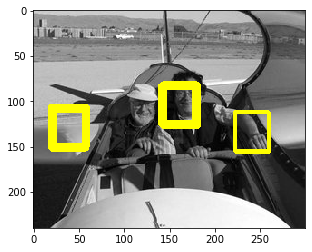

In [9]:
# Python program to illustrate template matching 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt  

# Read the main image 
img_rgb = cv2.imread('mainimage.jpg')

# Convert it to grayscale 
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) 
  
# Read the template 
template = cv2.imread('Template.jpg',0) 
  
# Store width and height of template in w and h 
w, h = template.shape[::-1] 
  
# Perform match operations. 
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED) 

# Specify a threshold 
threshold = 0.6
  
# Store the coordinates of matched area in a numpy array 
loc = np.where(res >= threshold)

# Draw a rectangle around the matched region. 
for pt in zip(*loc[::-1]): 
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2) 

# Show the final image with the matched area. 
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))

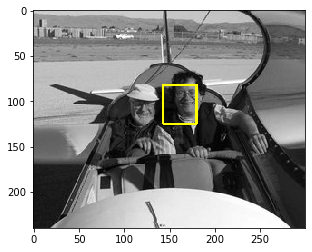

In [23]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt  

# Read the main image 
img_rgb = cv2.imread('mainimage.jpg')
  
# Convert it to grayscale 
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) 

# Read the template 
template = cv2.imread('Template.jpg',0) 

# Store width and height of template in w and h 
w, h = template.shape[::-1] 
  
# Perform match operations. 
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED) 

# We localize the minimum and maximum values in the result matrix R by using minMaxLoc().
# minMaxLoc(src[, mask]) -> minVal, maxVal, minLoc, maxLoc
# For the first two methods ( TM_SQDIFF and MT_SQDIFF_NORMED ) the best match are the lowest values. 
# For all the others, higher values represent better matches.
_minVal, _maxVal, minLoc, maxLoc = cv2.minMaxLoc(res, None)

# Draw a rectangle around the matched region, we used the maxvalue here bcz of cv2.TM_CCOEFF_NORMED
cv2.rectangle(img_rgb, maxLoc, (maxLoc[0] + w, maxLoc[1] + h), (0,255,255), 2) 

# Show the final image with the matched area. 
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))

### Limitations of Template Matching:

- 1) It does not work for rotated or scaled versions of the template as a change in shape/size/shear etc. of object w.r.t. template will give a false match.
- 2) The process is time consuming, so it is inefficient when calculating the pattern correlation image for medium to large images.


---


## Multiscaling mechanism in Template Matching


If we try to apply template matching using the `cv2.matchTemplate` function, we are left with a false match — this is because the size of the logo image is substantially smaller than the Call of Duty logo on the game cover.

In case , when the dimensions of our template do not match the dimensions of the region in the image we want to match, we can use **multiscaling**.


**The process of Multi scaling is as follows:**

- Loop over the input image at multiple scales (i.e. decrease the input image size progressively).

- Apply template matching using `cv2.matchTemplate` and keep track of the match with the **largest correlation coefficient** (along with the **x**, **y-coordinates** of the region with the largest correlation coefficient).

- After looping over all scales, take the region with the largest correlation coefficient and use that as your “matched” region.


**Link:** [https://www.pyimagesearch.com/2015/01/26/multi-scale-template-matching-using-python-opencv/](https://www.pyimagesearch.com/2015/01/26/multi-scale-template-matching-using-python-opencv/)

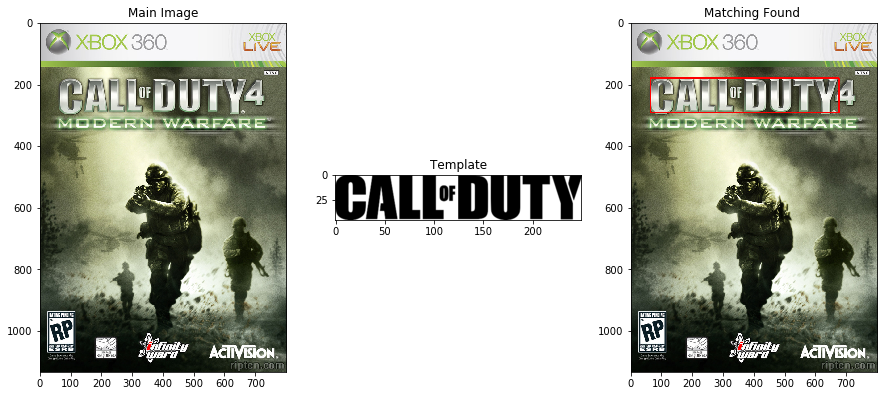

In [10]:
# Python program to illustrate multiscaling in template matching 
import cv2 
import numpy as np 
import imutils
import matplotlib.pyplot as plt  

# Load the image template
main_template = cv2.imread("cod_logo.png")
main_template = cv2.cvtColor(main_template, cv2.COLOR_BGR2RGB)

# Convert it to grayscale
template = cv2.cvtColor(main_template, cv2.COLOR_BGR2GRAY)

# Detect edges using Canny
template = cv2.Canny(template, 50, 200)

# Determine width and height
h, w = template.shape[:2]

# load the image
image = cv2.imread("cod_mw.jpg")

# Convert it to grayscale,
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# we initialize a variable found to keep track of the region and scale of the image with the best match.
found = None
  
    
# we’ll start from 100% of the original size of the image
# and work our way down to 20% of the original size in 20 equally sized percent chunks.
for scale in np.linspace(0.2, 1.0, 20)[::-1]: 
  
    # We then resize the image according to the current scale and compute the ratio of the old width to the new width
    resized = imutils.resize(img_gray, width = int(img_gray.shape[1] * scale)) 
    r = img_gray.shape[1] / float(resized.shape[1]) 
   
    # if the resized image is smaller than the template, then break from the loop
    if resized.shape[0] < h or resized.shape[1] < w: 
            break
    
    # detect edges in the resized, grayscale image and apply template
    # matching to find the template in the image
    edged  = cv2.Canny(resized, 50, 100)
    result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
    (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
    
    # if we have found a new maximum correlation value, 
    # then update the found variable if found is None or maxVal > found[0]: 
    if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)

# unpack the found varaible and compute the (x, y) coordinates of the bounding box based on the resized ratio 
(_, maxLoc, r) = found 
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r)) 
(endX, endY) = (int((maxLoc[0] + w) * r), int((maxLoc[1] + h) * r)) 
  
# draw a bounding box around the detected result and display the image 
image_copy = np.copy(image) 
cv2.rectangle(image_copy, (startX, startY), (endX, endY), (0, 0, 255), 4) 


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))
ax1.set_title('Main Image')
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

ax2.set_title('Template')
ax2.imshow(cv2.cvtColor(main_template, cv2.COLOR_BGR2RGB))

ax3.set_title('Matching Found ')
ax3.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))


In [7]:
np.linspace(0.2, 1.0, 20)[::-1]

array([1.        , 0.95789474, 0.91578947, 0.87368421, 0.83157895,
       0.78947368, 0.74736842, 0.70526316, 0.66315789, 0.62105263,
       0.57894737, 0.53684211, 0.49473684, 0.45263158, 0.41052632,
       0.36842105, 0.32631579, 0.28421053, 0.24210526, 0.2       ])

---

# Opencv Python program for Face Detection




The objective of the program given is to detect object of interest(face) in real time and to keep tracking of the same object.



### Haar Feature-based Cascade Classifier for Object Detection

**Step-by-Step**

- 1- First, a classifier (namely a cascade of boosted classifiers working with haar-like features) is trained with a few hundred sample views of a particular object (i.e., a face or a car), called positive examples, that are scaled to the same size, and negative examples of the same size.


- 2- After a classifier is trained, it can be applied to a region of interest (of the same size as used during the training) in an input image by moving a **resizable searching window** across the image and check every location using the classifier. The classifier outputs a **“1”** if the region is likely to show the object (i.e., face/car), and **“0”** otherwise.


**Synax** `cv2.CascadeClassifier([filename]) → <CascadeClassifier object>`
- **Parameters:**	
    - **filename** – Name of the file from which the classifier is loaded.
    
---  
**Synax** `cv.CascadeClassifier.detectMultiScale(image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]]]]] → objects`

Detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles. Based on these list we will draw a rectangle around the face.

- **Parameters:**
     - **image**   – Matrix of the type CV_8U containing an grayscale image where objects are detected.
     - **scaleFactor** – Parameter specifying how much the image size is reduced at each image scale.
     - **minNeighbors** – Parameter specifying how many neighbors each candidate rectangle should have to retain it.
     - **flags** –	Parameter with the same meaning for an old cascade as in the function cvHaarDetectObjects. It is not used for a new cascade.
     - **minSize** – Minimum possible object size. Objects smaller than that are ignored.
     - **maxSize** – Maximum possible object size. Objects larger than that are ignored. 
     - If `maxSize == minSize` model is evaluated on single scale.
     
     
- **Returns:**
    - ***objects*** – Vector of rectangles where each rectangle contains the detected object, the rectangles may be partially outside the original image

In [ ]:
import cv2  
import matplotlib.pyplot as plt  

# load the required trained XML classifiers 

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
eye_cascade  = cv2.CascadeClassifier('haarcascade_eye.xml')  


# capture frames from a camera 
cap = cv2.VideoCapture(0) 

# loop runs if capturing has been initialized. 
while 1:  
  
    # reads frames from a camera 
    ret, img = cap.read()  
  
    # convert to gray scale of each frames 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
    # Detects faces of different sizes in the input image 
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
  
    for (x,y,w,h) in faces: 
        # To draw a rectangle in a face  
        cv2.rectangle(img,(x,y), (x+w,y+h), (255,255,0), 2)  
        roi_gray  = gray[y:y+h, x:x+w] 
        roi_color = img[y:y+h, x:x+w] 
  
        # Detects eyes of different sizes in the input image 
        eyes = eye_cascade.detectMultiScale(roi_gray)  
  
        #To draw a rectangle in eyes 
        for (ex,ey,ew,eh) in eyes: 
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,127,255),2) 
  
    # Display an image in a window 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Circle Detection using OpenCV | Python


### Basics of Circle Detection

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190704214911/circle.jpeg" width="300">

- To detect circles we are required to find 3 parameters: **a, b** and **r**. Therefore, the problem is in a 3-dimensional search space. 

- To find possible circles, the algorithm uses a **3-D** matrix called the **“Accumulator Matrix”** to store potential a, b and r values. 

- The value of **a** (x-coordinate of the center) may range from **1 to rows**, **b** (y-coordinate of the center) may range from **1 to cols**, and **r** may range from **1 to `maxRadius = sqrt(rows^2 + cols^2)`.


### Step-by-Step:

- **1- Initializing the Accumulator Matrix:** Initialize a matrix of dimensions rows * cols * maxRadius with zeros.
- **2- Pre-processing the image:** Apply blurring, grayscale and an edge detector on the image. This is done to ensure the circles show as darkened image edges.
- **3- Looping through the points:** Pick a point x_i on the image.
- **4- Fixing r and looping through a and b:** Use a double nested loop to find a value of r, varying a and b in the given ranges.
- **5- Voting:** Pick the points in the accumulator matrix with the maximum value. These are strong points which indicate the existence of a circle with a, b and r parameters. This gives us the Hough space of circles.
- **6- Finding Circles:** Finally, using the above circles as candidate circles, vote according to the image. The maximum voted circle in the accumulator matrix gives us the circle.

---

### Openvc function

As we saw we have 3 parameters, so we need a 3D accumulator for hough transform, which would be highly ineffective. So OpenCV uses more trickier method, Hough Gradient Method which uses the gradient information of edges.

***Syntax***: `cv.HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]])`

- ***image:***	8-bit, single-channel, grayscale input image.



- **method:** Detection method.  Currently, the only implemented method is HOUGH_GRADIENT


- ***dp:***   inverse ratio of the accumulator resolution to the image resolution. For example, if dp = 1 , the accumulator has the same resolution as the input image. If dp = 2 , the accumulator has half as big width and height.


- ***minDist:***    minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.


- ***Param1:*** Canny edge detection requires two parameters — **minVal** and **maxVal**. Param1 is the higher threshold of the two. The second one is set as **param1/2**.


- ***Param2:*** This is the accumulator threshold for the candidate detected circles. By increasing this threshold value, we can ensure that only the best circles, corresponding to larger accumulator values, are returned.


- **minRadius:** Minimum circle radius.
- **maxRadius:** Maximum circle radius.


- **Returns:**
    - ***circles:***	Output vector of found circles. Each vector is encoded as 3 or 4 element floating-point vector (x,y,radius) or (x,y,radius,votes) .



> If you want get better detection of small circles, you may try to limit the search range [minRadius, maxRadius] to avoid many false circles.

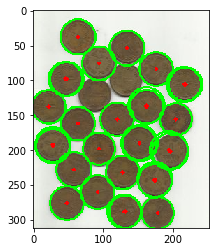

In [21]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt  
 
# Read image. 
img = cv2.imread('coins.png', cv2.IMREAD_COLOR) 
  
# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Blur using 3 * 3 kernel.
# go back to blur() 
gray_blurred = cv2.blur(gray, (5, 5)) 
  
# Apply Hough transform on the blurred image. 
# cv.HoughCircles(image, method, dp, minDist, circles, param1, param2, minRadius, maxRadius)
detected_circles = cv2.HoughCircles(gray_blurred,  cv2.HOUGH_GRADIENT, 1, 1,
                                    param1 = 60,  param2 = 30, minRadius = 1, maxRadius = 40) 
  
# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    for circle in detected_circles[0, :]: 
        x, y, r = circle[0], circle[1], circle[2] 
        
        # Draw the circumference of the circle. 
        cv2.circle(img, (x, y), r, (0, 255, 0), 2) 
  
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (x, y), 1, (0, 0, 255), 3) 
        
        # show result
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))